In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [11]:
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [12]:
from sklearn.svm import SVC

model_SVC=SVC(kernel='rbf',random_state=4)
model_SVC.fit(X_train,y_train)

y_pred_svm=model_SVC.decision_function(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

model_logistic=LogisticRegression()
model_logistic.fit(X_train,y_train)

y_pred_logistic=model_logistic.decision_function(X_test)

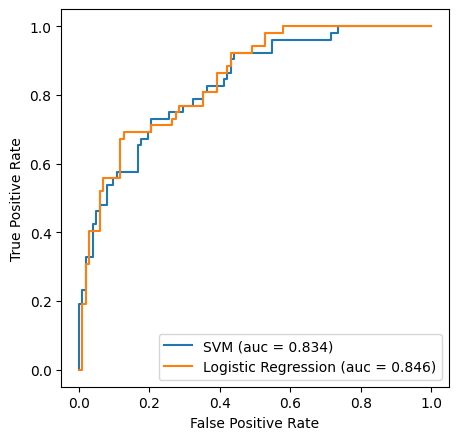

In [16]:
from sklearn.metrics import roc_curve,auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr,logistic_tpr)

svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_svm)
auc_svm=auc(svm_fpr,svm_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (auc = %0.3f)' %auc_svm)
plt.plot(logistic_fpr,logistic_tpr,linestyle='-',label='Logistic Regression (auc = %0.3f)' %auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()